In [10]:
# https://machinelearningmastery.com/feature-selection-machine-learning-python/
from pandas import read_csv
from matplotlib import pyplot

# load data
filename = "../data/external/pima-indians-diabetes.csv"
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

[0.11  0.226 0.1   0.079 0.078 0.145 0.117 0.145]
Feature: 0, Score: 0.11044
Feature: 1, Score: 0.22596
Feature: 2, Score: 0.09993
Feature: 3, Score: 0.07946
Feature: 4, Score: 0.07762
Feature: 5, Score: 0.14501
Feature: 6, Score: 0.11685
Feature: 7, Score: 0.14473


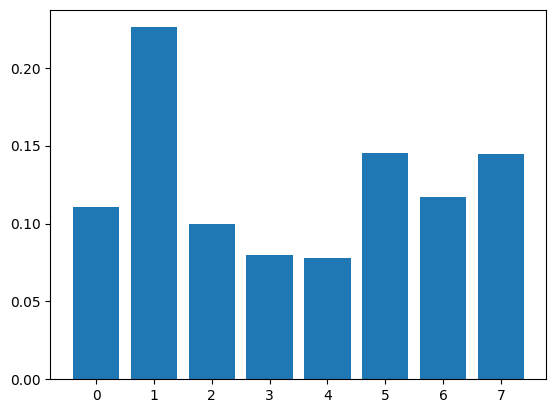

In [11]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, Y)
# display the relative importance of each attribute
print(model.feature_importances_)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]
[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]
Feature: 0, Score: 39.67023
Feature: 1, Score: 213.16175
Feature: 2, Score: 3.25695
Feature: 3, Score: 4.30438
Feature: 4, Score: 13.28111
Feature: 5, Score: 71.77207
Feature: 6, Score: 23.87130
Feature: 7, Score: 46.14061


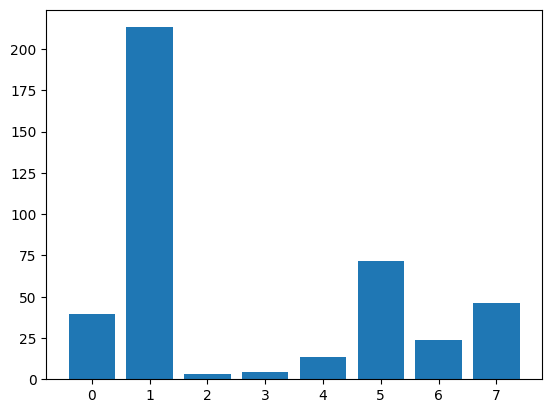

In [12]:
# Feature Selection with Univariate Statistical Tests
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5, :])
# get importance
importance = fit.scores_
# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 3 5 4 1 1 2]
Feature: 0, Score: 1
Feature: 1, Score: 1
Feature: 2, Score: 3
Feature: 3, Score: 5
Feature: 4, Score: 4
Feature: 5, Score: 1
Feature: 6, Score: 1
Feature: 7, Score: 2


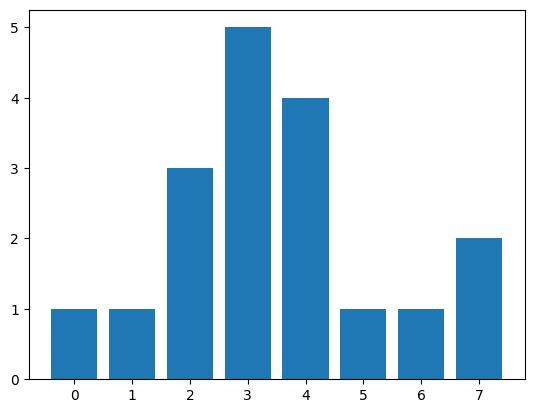

In [13]:
# Feature Extraction with Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver="lbfgs", max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
# get importance
importance = fit.ranking_
# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %0d" % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.02059
Feature: 1, Score: 0.00592
Feature: 2, Score: -0.00233
Feature: 3, Score: 0.00015
Feature: 4, Score: -0.00018
Feature: 5, Score: 0.01324
Feature: 6, Score: 0.14724
Feature: 7, Score: 0.00262


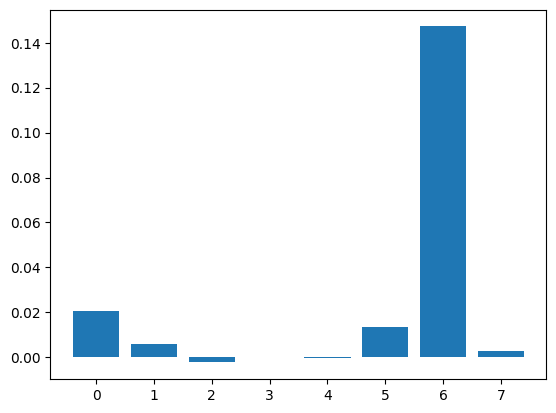

In [14]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression

# define the model
model = LinearRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_
# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.05100
Feature: 1, Score: 0.33143
Feature: 2, Score: 0.09080
Feature: 3, Score: 0.01962
Feature: 4, Score: 0.03545
Feature: 5, Score: 0.24624
Feature: 6, Score: 0.12443
Feature: 7, Score: 0.10102


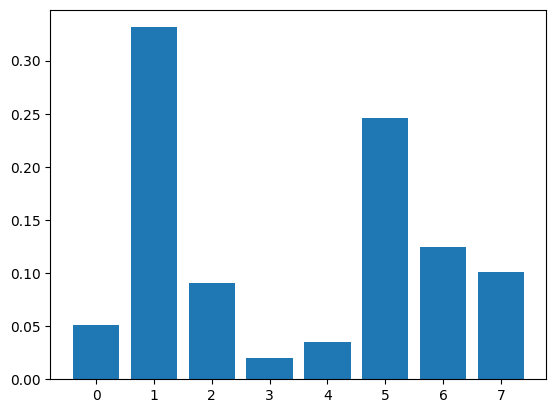

In [15]:
# decision tree feature importance
from sklearn.tree import DecisionTreeRegressor

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.06392
Feature: 1, Score: 0.33463
Feature: 2, Score: 0.08627
Feature: 3, Score: 0.05027
Feature: 4, Score: 0.05313
Feature: 5, Score: 0.16492
Feature: 6, Score: 0.13191
Feature: 7, Score: 0.11495


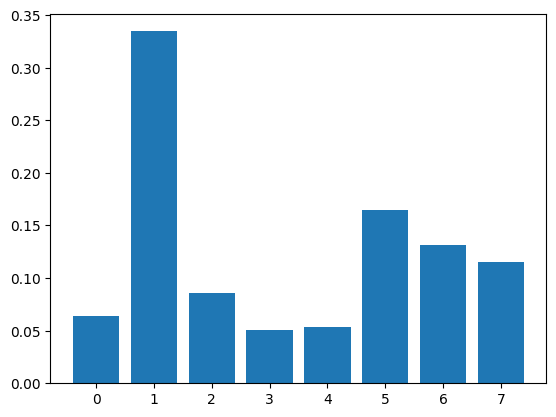

In [16]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.04991
Feature: 1, Score: 0.23885
Feature: 2, Score: 0.11527
Feature: 3, Score: 0.05617
Feature: 4, Score: 0.11613
Feature: 5, Score: 0.15752
Feature: 6, Score: 0.10297
Feature: 7, Score: 0.16318


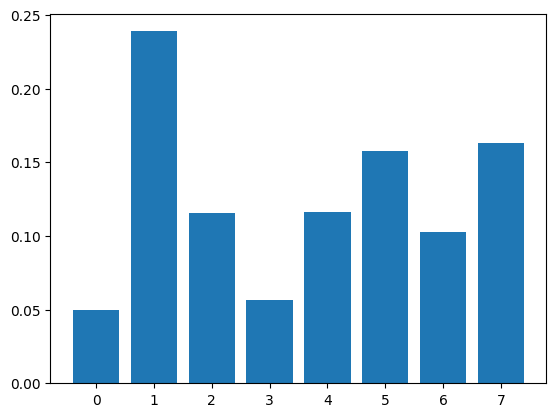

In [17]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor

# define the model
model = XGBRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: -0.00054
Feature: 1, Score: 0.10971
Feature: 2, Score: 0.01804
Feature: 3, Score: 0.01305
Feature: 4, Score: 0.04671
Feature: 5, Score: 0.00543
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02126


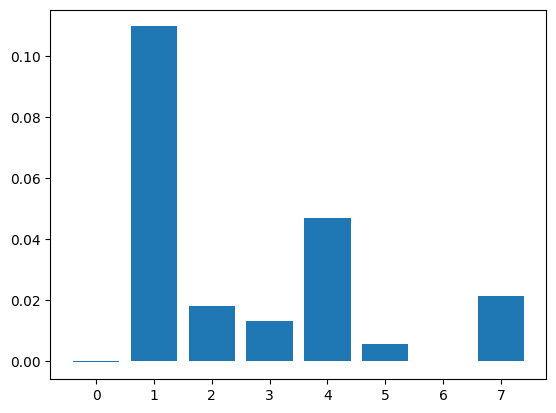

In [18]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, Y)
# perform permutation importance
results = permutation_importance(model, X, Y, scoring="neg_mean_squared_error")
# get importance
importance = results.importances_mean
# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Explained Variance: [0.889 0.062 0.026 0.013]
Feature: 0, Score: -0.00202
Feature: 1, Score: 0.09781
Feature: 2, Score: 0.01609
Feature: 3, Score: 0.06076
Feature: 4, Score: 0.99311
Feature: 5, Score: 0.01401
Feature: 6, Score: 0.00054
Feature: 7, Score: -0.00356


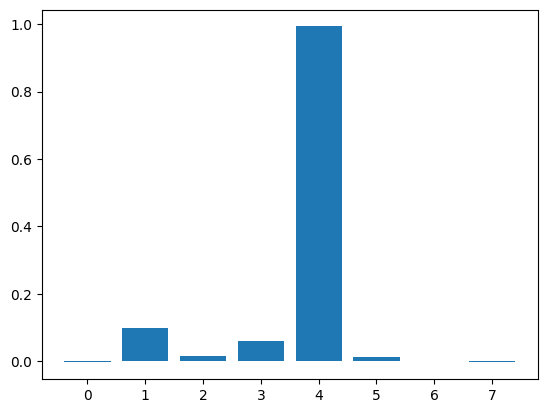

Feature: 0, Score: -0.02265
Feature: 1, Score: -0.97221
Feature: 2, Score: -0.14191
Feature: 3, Score: 0.05786
Feature: 4, Score: 0.09463
Feature: 5, Score: -0.04697
Feature: 6, Score: -0.00082
Feature: 7, Score: -0.14017


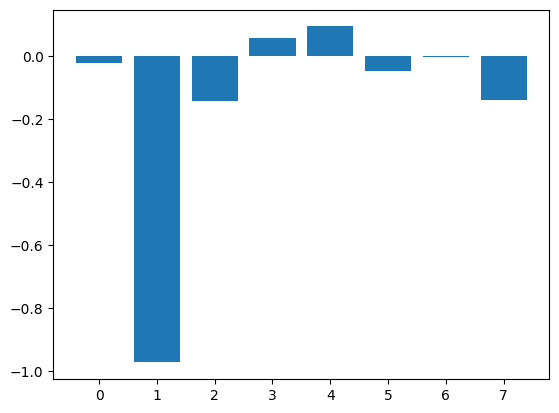

Feature: 0, Score: -0.02246
Feature: 1, Score: 0.14343
Feature: 2, Score: -0.92247
Feature: 3, Score: -0.30701
Feature: 4, Score: 0.02098
Feature: 5, Score: -0.13244
Feature: 6, Score: -0.00064
Feature: 7, Score: -0.12545


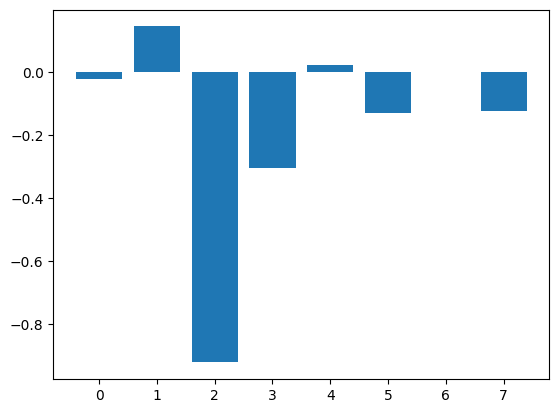

Feature: 0, Score: -0.04905
Feature: 1, Score: 0.11983
Feature: 2, Score: -0.26274
Feature: 3, Score: 0.88437
Feature: 4, Score: -0.06555
Feature: 5, Score: 0.19280
Feature: 6, Score: 0.00270
Feature: 7, Score: -0.30102


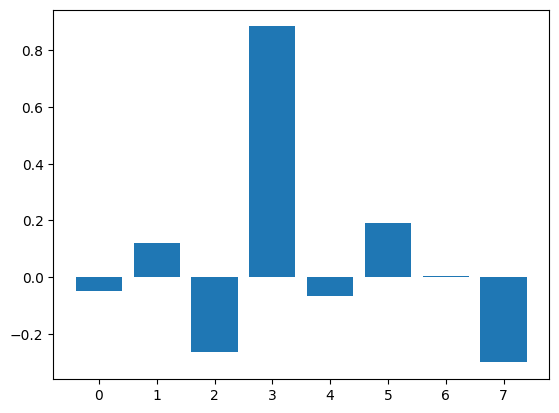

In [19]:
# Feature Extraction with Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=4)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
for importance in fit.components_:
    # summarize feature importance
    for i, v in enumerate(importance):
        print("Feature: %0d, Score: %.5f" % (i, v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

In [20]:
# evaluation of a model using all features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
# fit the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(Y_test, yhat)
print("Accuracy: %.2f" % (accuracy * 100))

Accuracy: 77.92
